In [37]:
!pip install abc-analysis
!pip install sklearn
!pip install sklearn
!pip install xgboost

  Using cached xgboost-1.6.1-py3-none-manylinux2014_x86_64.whl (192.9 MB)


# Delay_ABC

The column **Delay_ABC** is determined by dividing the range of **NormalizedDelay**>0 based on the Pareto Principle by using the ABC Analysis. This is done by classifying the delays in these categories:

0: Contracts of 0 days added

1: Contracts with **NormalizedDelay** belonging to category **A** on the ABC Analysis

2: Contracts with **NormalizedDelay** belonging to category **B** on the ABC Analysis

3: Contracts with **NormalizedDelay** belonging to category **C** on the ABC Analysis

In [4]:
#Import Libraries
import pandas as pd
import missingno as msn
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Para realizar el análisis ABC
from abc_analysis import abc_analysis as abc

In [8]:
#Read data file obtained from datos.gov.co
# path = "C:/Users/User/Downloads/ds4a-secopII/" #path Carlos
#path = "C:/Users/VMNR/Desktop/" #path vicman
# path = "../data/" #path GENERAL
path = "../../git/secop-ds4a/dash_app/assets/data/"   #path de la maquina
file_name = 'SECOP_Electronicos_Cleaned.csv'

#Select the columns that we want to parse as dates.
date_cols = ['Fecha de Inicio del Contrato', 'Fecha de Fin del Contrato']

df = pd.read_csv(path+file_name, parse_dates=date_cols, low_memory=False)


In [10]:

print('The shape of the original dataset is : ' + str(df.shape))

The shape of the original dataset is : (1562161, 35)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562161 entries, 0 to 1562160
Data columns (total 35 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   Unnamed: 0                       1562161 non-null  int64         
 1   Nombre Entidad                   1562161 non-null  object        
 2   Departamento                     1562161 non-null  object        
 3   Orden                            1562161 non-null  object        
 4   Sector                           1562161 non-null  object        
 5   Rama                             1562161 non-null  object        
 6   Entidad Centralizada             1562161 non-null  object        
 7   Estado Contrato                  1562161 non-null  object        
 8   Tipo de Contrato                 1562161 non-null  object        
 9   Modalidad de Contratacion        1562161 non-null  object        
 10  Fecha de Inicio del Contrato  

In [12]:
cat_cols = ['Departamento', 'Orden', 'Sector', 'Rama','Entidad Centralizada', 'Estado Contrato', 'Tipo de Contrato', 'Modalidad de Contratacion',
            'Es Grupo','Es Pyme', 'Destino Gasto', 'EsPostConflicto', 'Delay']
cat_values = {key:'category' for key in cat_cols}
df = df.astype(cat_values)

In [13]:
df.drop(columns='Unnamed: 0', inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562161 entries, 0 to 1562160
Data columns (total 34 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   Nombre Entidad                   1562161 non-null  object        
 1   Departamento                     1562161 non-null  category      
 2   Orden                            1562161 non-null  category      
 3   Sector                           1562161 non-null  category      
 4   Rama                             1562161 non-null  category      
 5   Entidad Centralizada             1562161 non-null  category      
 6   Estado Contrato                  1562161 non-null  category      
 7   Tipo de Contrato                 1562161 non-null  category      
 8   Modalidad de Contratacion        1562161 non-null  category      
 9   Fecha de Inicio del Contrato     1562161 non-null  datetime64[ns]
 10  Fecha de Fin del Contrato     

In [15]:
df2 = df[df['Dias Adicionados']>0]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231621 entries, 17 to 1562154
Data columns (total 34 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Nombre Entidad                   231621 non-null  object        
 1   Departamento                     231621 non-null  category      
 2   Orden                            231621 non-null  category      
 3   Sector                           231621 non-null  category      
 4   Rama                             231621 non-null  category      
 5   Entidad Centralizada             231621 non-null  category      
 6   Estado Contrato                  231621 non-null  category      
 7   Tipo de Contrato                 231621 non-null  category      
 8   Modalidad de Contratacion        231621 non-null  category      
 9   Fecha de Inicio del Contrato     231621 non-null  datetime64[ns]
 10  Fecha de Fin del Contrato        231621 no

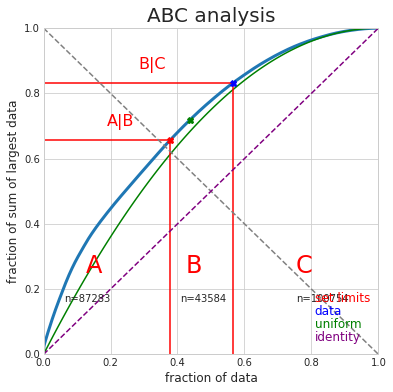

In [16]:
df_de_ABC = abc(df2['NormalizedDelay'], True)

In [17]:
#df_de_ABC

In [18]:
#Crear columna vacía
df['Delay_ABC'] = 0
# Categorías
limit_AB = df_de_ABC['ABLimit']
limit_BC = df_de_ABC['BCLimit'] + limit_AB
limit_AB,limit_BC


(0.3113636363636363, 0.5276645768025077)

## Intervalos

0:  **NormalizedDelay** = 0

1: 0 < **NormalizedDelay** $\leq$ 0.3113636363636363

2: 0.3113636363636363 < **NormalizedDelay** $\leq$ 0.5276645768025077

3:  **NormalizedDelay** > 0.5276645768025077

In [19]:
df['Delay_ABC'].sample(5)

1246407    0
1273139    0
1160988    0
164460     0
1075418    0
Name: Delay_ABC, dtype: int64

In [20]:
df.loc[(df['NormalizedDelay'] > 0)& (df['NormalizedDelay'] <= limit_AB), 'Delay_ABC'] = 1
df.loc[(df['NormalizedDelay'] > limit_AB) & (df['NormalizedDelay'] <= limit_BC), 'Delay_ABC']= 2
df.loc[(df['NormalizedDelay'] > limit_BC), 'Delay_ABC'] = 3

In [21]:
df[df.Delay_ABC==0].sample()

,Nombre Entidad,Departamento,Orden,Sector,Rama,Entidad Centralizada,Estado Contrato,Tipo de Contrato,Modalidad de Contratacion,Fecha de Inicio del Contrato,...,Dias Adicionados,PGN,SGP,SGR,RP_AGR,RP_NO_AGR,RC,Delay,NormalizedDelay,Delay_ABC
20096,SECRETARÍA DISTRITAL DE CULTURA RECREACIÓN Y ...,"Bogotá, D.C.",Territorial,Cultura,Ejecutivo,Centralizada,Activo,DecreeLaw092/2017,Contratación régimen especial,2020-03-24,...,0,0,0,0,0,0,0,0,0.0,0


In [22]:
df[df.Delay_ABC==1].sample()

,Nombre Entidad,Departamento,Orden,Sector,Rama,Entidad Centralizada,Estado Contrato,Tipo de Contrato,Modalidad de Contratacion,Fecha de Inicio del Contrato,...,Dias Adicionados,PGN,SGP,SGR,RP_AGR,RP_NO_AGR,RC,Delay,NormalizedDelay,Delay_ABC
1553494,DISPENSARIO MEDICO NIVEL II BOGOTA,"Bogotá, D.C.",Nacional,defensa,Ejecutivo,Centralizada,Modificado,Prestación de servicios,Contratación directa,2021-02-13,...,31,1,0,0,0,0,0,1,0.155779,1


In [23]:
df[df.Delay_ABC==2].sample()

,Nombre Entidad,Departamento,Orden,Sector,Rama,Entidad Centralizada,Estado Contrato,Tipo de Contrato,Modalidad de Contratacion,Fecha de Inicio del Contrato,...,Dias Adicionados,PGN,SGP,SGR,RP_AGR,RP_NO_AGR,RC,Delay,NormalizedDelay,Delay_ABC
98998,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR E.S.E,"Bogotá, D.C.",Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,Modificado,Prestación de servicios,Contratación régimen especial,2022-02-02,...,91,0,0,0,0,1,0,2,0.50838,2


In [24]:
df[df.Delay_ABC==3].sample()

,Nombre Entidad,Departamento,Orden,Sector,Rama,Entidad Centralizada,Estado Contrato,Tipo de Contrato,Modalidad de Contratacion,Fecha de Inicio del Contrato,...,Dias Adicionados,PGN,SGP,SGR,RP_AGR,RP_NO_AGR,RC,Delay,NormalizedDelay,Delay_ABC
1136349,SUBRED INTEGRADA DE SERVICIOS DE SALUD NORTE E...,"Bogotá, D.C.",Territorial,Salud y Protección Social,Corporación Autónoma,Descentralizada,Modificado,DecreeLaw092/2017,Contratación régimen especial,2021-02-24,...,31,0,0,0,0,1,0,3,0.885714,3


# Delay_EQ

The column **Delay_EQ** is determined by dividing the range of **NormalizedDelay**>0 which is (0,1] into equal intervals.
By that our categories below this criteria would be:

0: Contracts of 0 days added

1: Contracts with **NormalizedDelay** $\leq$ 0.3333333333333333

2: Contracts with **NormalizedDelay** $\leq$ 0.6666666666666667

3: Contracts with **NormalizedDelay** > 0.6666666666666667

In [25]:
df['Delay_EQ'] = 0
limit_1 = 0.3333333333333333
limit_2 = 0.6666666666666667

In [26]:
df.loc[(df['NormalizedDelay'] > 0)& (df['NormalizedDelay'] <= limit_1), 'Delay_EQ'] = 1
df.loc[(df['NormalizedDelay'] > limit_1) & (df['NormalizedDelay'] <= limit_2), 'Delay_EQ']= 2
df.loc[(df['NormalizedDelay'] > limit_2), 'Delay_EQ'] = 3

In [27]:
df.sample(10)

,Nombre Entidad,Departamento,Orden,Sector,Rama,Entidad Centralizada,Estado Contrato,Tipo de Contrato,Modalidad de Contratacion,Fecha de Inicio del Contrato,...,PGN,SGP,SGR,RP_AGR,RP_NO_AGR,RC,Delay,NormalizedDelay,Delay_ABC,Delay_EQ
41960,GOBERNACION NORTE DE SANTANDER,Norte de Santander,Territorial,No aplica/No pertenece,Ejecutivo,Centralizada,Modificado,Prestación de servicios,Contratación directa,2022-01-28,...,0,0,0,1,0,0,0,0.000000,0,0
1421500,DEPARTAMENTO ADMINISTRATIVO NACIONAL DE ESTADÍ...,Atlántico,Nacional,Información Estadística,Ejecutivo,Descentralizada,En ejecución,Prestación de servicios,Contratación directa,2021-01-18,...,1,0,0,0,0,0,0,0.000000,0,0
1546700,MUNICIPIO DE LA UNION,Valle del Cauca,Territorial,No aplica/No pertenece,Ejecutivo,Centralizada,En ejecución,Prestación de servicios,Contratación directa,2021-04-23,...,0,1,0,0,0,0,0,0.000000,0,0
1351061,CONTRALORIA DEPARTAMENTAL DEL HUILA,Huila,Territorial,Servicio Público,Corporación Autónoma,Centralizada,Activo,Prestación de servicios,Selección Abreviada de Menor Cuantía,2018-10-31,...,0,0,0,0,0,0,0,0.000000,0,0
309085,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,"Bogotá, D.C.",Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,Modificado,Prestación de servicios,Contratación régimen especial,2022-04-04,...,0,0,0,1,0,0,2,0.333333,2,1
429971,ALCALDIA DISTRITAL BARRANCABERMEJA,Santander,Territorial,Servicio Público,Ejecutivo,Centralizada,terminado,Prestación de servicios,Contratación directa,2021-07-28,...,0,0,0,1,0,0,0,0.000000,0,0
661860,INSTITUTO DE MOVILIDAD DE PEREIRA,Risaralda,Territorial,Transporte,Ejecutivo,Descentralizada,Modificado,Prestación de servicios,Contratación directa,2022-02-03,...,0,0,0,0,1,0,0,0.000000,0,0
1087886,JARDÍN BOTÁNICO JOSÉ CELESTINO MUTIS,"Bogotá, D.C.",Territorial,Ambiente y Desarrollo Sostenible,Corporación Autónoma,Descentralizada,terminado,Prestación de servicios,Contratación directa,2019-02-22,...,0,0,0,0,0,0,0,0.000000,0,0
39930,MUNICIPIO DE VILLA DE LEYVA,Boyacá,Territorial,Servicio Público,Ejecutivo,Descentralizada,En ejecución,Prestación de servicios,Contratación directa,2021-11-12,...,0,0,0,1,0,0,0,0.000000,0,0
249293,PERSONERIA DE BOGOTA,"Bogotá, D.C.",Corporación Autónoma,Trabajo,Corporación Autónoma,Centralizada,Cerrado,Prestación de servicios,Contratación directa,2020-01-09,...,0,0,0,0,0,0,0,0.000000,0,0


# Modelo XGBoost-2 Variable Delay_ABC

In [28]:
print(df.columns)

Index(['Nombre Entidad', 'Departamento', 'Orden', 'Sector', 'Rama',
       'Entidad Centralizada', 'Estado Contrato', 'Tipo de Contrato',
       'Modalidad de Contratacion', 'Fecha de Inicio del Contrato',
       'Fecha de Fin del Contrato', 'Es Grupo', 'Es Pyme',
       'Obligación Ambiental', 'Obligaciones Postconsumo',
       'Valor del Contrato', 'Valor de pago adelantado', 'Valor Facturado',
       'Valor Pendiente de Pago', 'Valor Pagado', 'Valor Amortizado',
       'Valor Pendiente de Amortizacion', 'Valor Pendiente de Ejecucion',
       'EsPostConflicto', 'Destino Gasto', 'Dias Adicionados', 'PGN', 'SGP',
       'SGR', 'RP_AGR', 'RP_NO_AGR', 'RC', 'Delay', 'NormalizedDelay',
       'Delay_ABC', 'Delay_EQ'],
      dtype='object')


In [29]:
y = df['Delay_ABC'].astype('category')
X = df.drop(['Delay'], axis=1)[['Departamento','Orden','Sector',
                                            'Rama','Entidad Centralizada',
                                            'Estado Contrato', 'Tipo de Contrato', 'Modalidad de Contratacion',
                                            'Es Grupo','Es Pyme', 'Valor del Contrato', 'Valor de pago adelantado',
                                             'Valor Facturado','Valor Pendiente de Pago', 'Valor Amortizado',
                                            'EsPostConflicto', 'Destino Gasto',
                                            'PGN','SGP','SGR','RP_AGR','RP_NO_AGR','RC']]

In [34]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n_samples = X_train.shape[0]

In [35]:
#!pip install xgboost

In [38]:
# Importación y definición de modelo XGBClassifier

from xgboost import XGBClassifier
from sklearn import metrics 

clf = XGBClassifier(tree_method="hist", enable_categorical=True)

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [39]:
metrics.f1_score(y_pred, y_test.values, average= 'macro'), metrics.accuracy_score(y_pred, y_test.values)

(0.6120535911329996, 0.9071722591433017)

# Modelo XGBoost-3 Variable Delay_EQ

In [40]:
y = df['Delay_EQ'].astype('category')

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n_samples = X_train.shape[0]

In [42]:
clf2 = XGBClassifier(tree_method="hist", enable_categorical=True)

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [43]:
metrics.f1_score(y_pred, y_test.values, average= 'macro'), metrics.accuracy_score(y_pred, y_test.values)
(0.6047590546102186, 0.9110945580527396

(0.6047590546102186, 0.9110945580527396)

# Modelo XGBoost -1 Ajustado con One Hot Encoding 

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562161 entries, 0 to 1562160
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Departamento               1562161 non-null  category
 1   Orden                      1562161 non-null  category
 2   Sector                     1562161 non-null  category
 3   Rama                       1562161 non-null  category
 4   Entidad Centralizada       1562161 non-null  category
 5   Estado Contrato            1562161 non-null  category
 6   Tipo de Contrato           1562161 non-null  category
 7   Modalidad de Contratacion  1562161 non-null  category
 8   Es Grupo                   1562161 non-null  category
 9   Es Pyme                    1562161 non-null  category
 10  Valor del Contrato         1562161 non-null  int64   
 11  Valor de pago adelantado   1562161 non-null  int64   
 12  Valor Facturado            1562161 non-null  int64   
 1

In [53]:
X = pd.get_dummies(X, drop_first=True)

In [54]:
y = df['Delay'].astype('category')

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n_samples = X_train.shape[0]

In [56]:
clf2 = XGBClassifier()

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [57]:
metrics.f1_score(y_pred, y_test.values, average= 'macro'), metrics.accuracy_score(y_pred, y_test.values)

(0.5800027375823203, 0.9010928898148256)

# Modelo XGBoost -2 Ajustado con One Hot Encoding 

In [82]:
y = df['Delay_ABC'].astype('category')

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n_samples = X_train.shape[0]

In [84]:
clf2 = XGBClassifier()

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
metrics.f1_score(y_pred, y_test.values, average= 'macro'), metrics.accuracy_score(y_pred, y_test.values)

In [76]:
np.mean(X_train.index)

780515.1612358321

## --------------------------------------------------------------------------------------------------------

In [58]:
y = df['Delay'].astype('category')

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n_samples = X_train.shape[0]

In [69]:
!pip install numpy 
import numpy as np

In [81]:
np.mean(X_train.index)

780515.1612358321

## -------------------------------------------------------------------------------------------------------------